In [39]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
plt.rcParams["animation.html"] = "jshtml"

In [44]:
#Utility functions to preocess poses. 
#Mainly checking for pose quality. Need to see if its possible to get a 
#coherent pose of a single individual across a video, for training 



limbSeq = [[1,8], [1,2],[1,5],[2,3],[3,4],[5,6],[6,7],[8,9],[9,10],
 [10,11],[8,12],[12,13],[13,14],[1,0],[0,15],[15,17],[0,16],
 [16,18],
 #[2,17],
#[5,18],
 [14,19],[19,20],[14,21],[11,22],[22,23],[11,24]]



def loadPoses(start_frame, stop_frame):
    scenes = []
    frame_to_f_name = {}
    for root, dirs, files in os.walk("testposes/", topdown=False):
        for f_name in files:
            frame_number = int(f_name.split('_')[1])
            frame_to_f_name[frame_number] = f_name
            
    for frame in range(start_frame,stop_frame+1):
        file_name = frame_to_f_name[frame]
        df = pd.read_json(os.path.join(root, file_name))
    
        people = df['people'].values

        scene = [person['pose_keypoints_2d'] for person in people]
        scenes.append(scene)
           
                
    return scenes
    
def getXYCoords(pose_keypoint):
    xs = []
    ys = []
    for i in range(0,len(pose_keypoint)-2,3):
        xs.append(pose_keypoint[i])
        ys.append(pose_keypoint[i+1])
    return xs,ys

def plotPose(pose_keypoint):
    xs,ys = getXYCoords(pose_keypoint)
    for n in limbSeq:
        plt.plot([xs[n[0]],xs[n[1]]],[-ys[n[0]],-ys[n[1]]])
    return plt
        
def plotScene(scene):
    for person_keypoint in scene:
        plotPose(person_keypoint)
    return plt
    

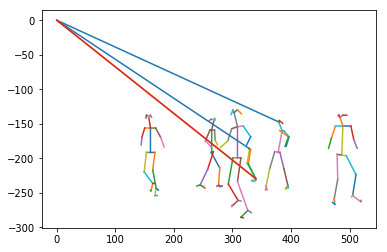

In [48]:
start_frame = 1000
end_frame = 1200
scenes = loadPoses(start_frame,end_frame)

plotScene(scenes[200])
plt.show()

Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/cbook/__init__.py", line 388, in process
    proxy(*args, **kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/cbook/__init__.py", line 228, in __call__
    return mtd(*args, **kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/animation.py", line 1026, in _start
    self._init_draw()
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/animation.py", line 1759, in _init_draw
    a.set_animated(self._blit)
AttributeError: module 'matplotlib.pyplot' has no attribute 'set_animated'


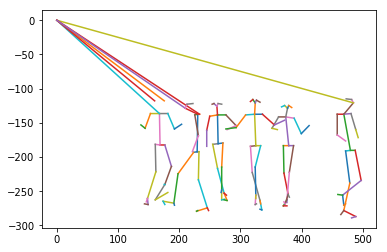

In [43]:
# fig, ax = plt.subplots()


# def animate(i):
#     return plotScene(scenes[i])
    

# # Init only required for blitting to give a clean slate.
# def init():
#     return plotScene(scenes[0]),


# start_frame = 500
# end_frame = 1000
# scenes = loadPoses(start_frame,end_frame)
# ani = animation.FuncAnimation(fig, animate, np.arange(start_frame, end_frame), init_func=init,
#                               interval=25, blit=True)

# from IPython.display import HTML
